In [1]:
#Need to import different libraries that you will rely on heavily in python (these are usually sufficient)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sm

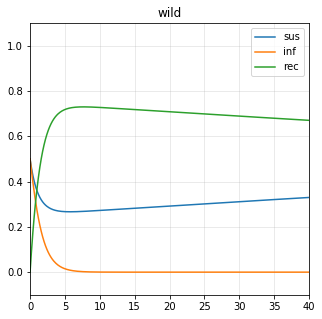

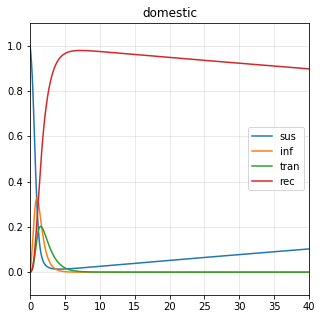

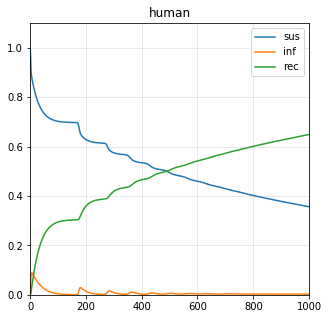

In [11]:
#Royce and Fu Model

plt.rcParams["figure.figsize"] = (5,5)

#Parameters
sw_0=0.5
iw_0=0.5
p_d=0.51
beta_d=0.89*5 #by 5 bc of pic
gamma_d=0.981
b_d=1/365
m_d=1/365
p_h=0.207
beta_h=0.078
gamma_h=0.091
b_h=0.0118/365 #daily instead of yearly rate
m_h=0.009/365 #daily instead of yearly rate
mu=0.499
beta_w=beta_d/5 #do not multiply beta_w by 5 for the pic
gamma_w=gamma_d
b_w=b_d
m_w=m_d

#10 equation system
def dW_dt(W,t):
    return [b_w-beta_w*W[0]*W[1]-m_w*W[0],
            beta_w*W[0]*W[1]-gamma_w*W[1]-m_w*W[1],
            gamma_w*W[1]-m_w*W[2],
            b_d-beta_d*W[3]*W[4]-p_d*W[3]*W[1]-beta_d*W[3]*W[5]-m_d*W[3],
            beta_d*W[3]*W[4]+p_d*W[3]*W[1]-mu*W[4]-gamma_d*W[4]-m_d*W[4],
            mu*W[4]+beta_d*W[3]*W[5]-gamma_d*W[5]-m_d*W[5],
            gamma_d*W[4]+gamma_d*W[5]-m_d*W[6],
            b_h-beta_h*W[7]*W[8]-p_h*W[7]*W[5]-m_h*W[7],
            beta_h*W[7]*W[8]+p_h*W[7]*W[5]-gamma_h*W[8]-m_h*W[8],
            gamma_h*W[8]-m_h*W[9]]

#time start-first component, time end-second component, steps-third component
ts=np.linspace(0,1000,10000)

#initial conditions
W0=[sw_0,iw_0,0,1,0,0,0,1,0,0]

#running the system
ans=odeint(dW_dt,W0,ts)

#pulling the solutions
susW=ans[:,0]
infW=ans[:,1]
recW=ans[:,2]
susD=ans[:,3]
infD=ans[:,4]
tranD=ans[:,5]
recD=ans[:,6]
susH=ans[:,7]
infH=ans[:,8]
recH=ans[:,9]

#Plot time vs wild solutions
plt.plot(ts,susW,label='sus')
plt.plot(ts,infW,label='inf')
plt.plot(ts,recW,label='rec')
plt.title('wild')
plt.ylim(-.1,1.1)
plt.xlim(0,40)
plt.legend()
plt.grid(alpha=0.33)
plt.show()

#Plot time vs domestic solutions
plt.plot(ts,susD,label='sus')
plt.plot(ts,infD,label='inf')
plt.plot(ts,tranD,label='tran')
plt.plot(ts,recD,label='rec')
plt.title('domestic')
plt.ylim(-.1,1.1)
plt.xlim(0,40)
plt.legend()
plt.grid(alpha=0.33)
plt.show()

#Plot time vs human solutions
plt.plot(ts,susH,label='sus')
plt.plot(ts,infH,label='inf')
plt.plot(ts,recH,label='rec')
plt.title('human')
plt.ylim(0,1.1)
plt.xlim(0,1000)
plt.legend()
plt.grid(alpha=0.33)
plt.show()